In [560]:
#getPosts

import numpy as np
import requests
from bs4 import BeautifulSoup
from pprint import pprint
import pandas as pd

file_loc=r"Experts.csv"
df=pd.read_csv(file_loc)

from flask import Flask
from flask_ask import Ask, statement
import tweepy 
from tweepy import OAuthHandler

app = Flask(__name__)
ask = Ask(app, '/')

consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret =''

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

def getTweetsForkeyword(Keyword):
    results = api.user_timeline(screen_name=Keyword,tweet_mode="extended",count=20)
    tweets=[]

    for tw in results:
        temp1 = tw.full_text
        temp2 = tw._json["entities"]["urls"]
        temp3 = tw._json["entities"]["user_mentions"]
        temp4 = tw._json["entities"]["hashtags"]

        if len(temp2) !=0:
            temp2=temp2[0]["expanded_url"]
        else:
            temp2=""
        
        temp=[]
        if len(temp3) !=0:
            for i in range(len(temp3)):
                temp.append(temp3[i]["screen_name"])
        else:
            temp=""
        
        tempp=[]
        if len(temp4) !=0:
            for i in range(len(temp4)):
                tempp.append(temp4[i]["text"])
        else:
            tempp=""
        
        tweets.append((temp1,temp2,temp,tempp))
    
    return tweets 

posts_all={}
writer = pd.ExcelWriter('Posts.xlsx', engine='xlsxwriter')

for i in df["TwitterName"]:
    posts=getTweetsForkeyword(i)
    df_twitter = pd.DataFrame(data = posts)
    df_twitter.to_excel(writer, sheet_name=i,index=False,header=["Post","URL","Names","Hashtag"])

writer.save()

'''
for i in df["TwitterName"]:
    posts=getTweetsForkeyword(i)
    posts_all[i]=posts

df_twitter = pd.DataFrame(data = posts_all)
df_twitter.to_csv("Posts.csv",index=False,header=True)
'''


'\nfor i in df["TwitterName"]:\n    posts=getTweetsForkeyword(i)\n    posts_all[i]=posts\n\ndf_twitter = pd.DataFrame(data = posts_all)\ndf_twitter.to_csv("C:\\Users\\Shuttle\\Downloads\\Python Course\\Project\\Posts.csv",index=False,header=True)\n'

In [323]:
df_twitter = pd.DataFrame(data = posts_all)
df_twitter.to_csv("Posts.csv",index=False,header=True)

In [145]:
file_loc=r"Posts.csv"
df=pd.read_csv(file_loc)

import re

info={}

def ExtractInfo(series):
    temp1= re.findall("(?P<url>https?://[^\s]+)", series) 
    temp2= re.findall(r'@([A-Za-z0-9_]+)', series) 
    temp3= re.findall(r'#([A-Za-z0-9_]+)', series) 
    return((temp1,temp2,temp3,series))

for i in df.keys():
    info[i] = df[i].apply(ExtractInfo)

pprint(info["@AndrewYNg"])

0     ([https://t.co/Ikowl10Lry], [], [], When you a...
1     ([https://t.co/Ryb1M2QyNn, https://t.co/zMoSMz...
2     ([https://t.co/bgECxxNTki], [Stanford, goodfel...
3     ([], [], [], It's not right for PhD programs t...
4     ([https://t.co/3V0PbDd9W1], [], [], Wow, as us...
5     ([https://t.co/OTXbGyWz5d], [editorialiste, nv...
6     ([https://t.co/BxUuObRErS, https://t.co/6aAoiw...
7     ([https://t.co/CjqbzSqwTx], [], [], Should rad...
8     ([https://t.co/ky4CiwsiuT, https://t.co/1NvGcR...
9     ([https://t.co/WbYj8gD3gQ], [], [], Another ex...
10    ([https://t.co/9t7Q0dnY21], [techreview, willk...
11    ([https://t.co/ckm3MsEkim], [goodfellow_ian], ...
12    ([], [dhawalkapil, drwoebot], [], @dhawalkapil...
13    ([], [nagaraj_arvind], [], @nagaraj_arvind Tha...
14    ([https://t.co/MT6B9FeI6o, https://t.co/l00ES1...
15    ([https://t.co/yITDJHKPHr], [danboneh, courser...
16    ([https://t.co/Ryb1M2QyNn], [], [], Convolutio...
17    ([https://t.co/fYhYCplK3w], [], [], AI app

In [132]:
df_twitter = pd.DataFrame(data = info)
df_twitter.to_csv("Posts_Processed.csv",index=False,header=True)

In [535]:
df_twitter

,Post,URL,Names
0,"RT @udacity: Thanks, @SmartHeroGismo, for the ...",NaN,"[u'udacity', u'SmartHeroGismo']"
1,I find this story very inspiring: https://t.co...,https://blog.udacity.com/2017/11/new-path-tech...,NaN
2,Five Technologies That Will Rock Your World ht...,https://nyti.ms/2jobOzj,NaN
3,RT @olivercameron: 🎉 Huge congrats to Team @W...,NaN,"[u'olivercameron', u'Waymo']"
4,Take my lesson on how my @stanford research te...,http://bit.ly/2hbOuRf,[u'Stanford']
5,@udacity is Silicon Valley'c choice for Deep L...,https://blog.udacity.com/2017/11/deep-learning...,[u'udacity']
6,RT @plagem: Breaking news: Big updates to Udac...,NaN,[u'plagem']
7,https://t.co/Ha6oXijD7I,https://medium.com/udacity/finding-lane-lines-...,NaN
8,@yuri_milner is a great guy! https://t.co/JCIy...,https://www.recode.net/2017/11/5/16610242/yuri...,[u'yuri_milner']
9,RT @udacity: We're proud to be included on the...,http://bit.ly/2z39WCq,[u'udacity']


In [557]:
#Extract URL and find best sources

import pandas as pd
from pprint import pprint
import requests
import urllib

def unshorten_url(url):
    resp = urllib.urlopen(url)
    return resp.url

file_loc=r"Posts.xlsx"
xls = pd.ExcelFile(file_loc)
# Now you can list all sheets in the file
temp_names=xls.sheet_names
df_twitter={}
url=[]
url_long=[]
pprint(temp_names)
for names in temp_names:
    print names
    df_twitter=pd.read_excel(file_loc,sheetname=names)
    df_twitter=df_twitter.fillna('')
    for j in df_twitter["URL"]:
        #print j
        if j !="": 
            if len(j)<23:
                temp_url=unshorten_url(j)
            else:
                temp_url=j
            url_long.append(temp_url)
            url.append(temp_url.split("//")[-1].split("/")[0])
            j=temp_url

pprint(url_long)
count_url={}
for i in url:
   count_url[i]=url.count(i)

for key, value in sorted(count_url.iteritems(), key=lambda (k,v): (v,k),reverse=True):
    print "%s: %s" % (key, value)

[u'@AndrewYNg',
 u'@ylecun',
 u'@drfeifei',
 u'@theamitsinghal',
 u'@gdb',
 u'@MFordFuture',
 u'@SebastianThrun']
@AndrewYNg
@ylecun


XLRDError: No sheet named <u'@ylecun'>

In [549]:
#Extract URL and find best sources
file_loc=r"Posts.xlsx"
xls = pd.ExcelFile(file_loc)
# Now you can list all sheets in the file
temp_names=xls.sheet_names
df_twitter={}
url=[]
url_long=[]

for names in temp_names:
    df_twitter=pd.read_excel(file_loc,sheetname=names)
    df_twitter=df_twitter.fillna('')
    for j in df_twitter["URL"]:
        #print j
        if j !="": 
            url_long.append(j)
            url.append(j.split("//")[-1].split("/")[0])

count_url={}
for i in url:
   count_url[i]=url.count(i)

for key, value in sorted(count_url.iteritems(), key=lambda (k,v): (v,k),reverse=True):
    print "%s: %s" % (key, value)

'https://techcrunch.com/gallery/dispatches-from-the-cutting-edge-of-computer-vision/'


In [377]:
#Find more info about mentioned users
user=[]

def getUserInfo(Keyword):
    results = api.get_user(screen_name=Keyword)
    return results
    
for i in df_twitter.keys():
    for j in df_twitter[i]:
        if j[2] !="" and len(j[2])==1: 
            user.append(j[2][0])
        elif len(j[2])>1:
            for k in j[2]:
                user.append(k)

count_user={}
for i in user:
   count_user[i]=user.count(i)       

for key, value in sorted(count_user.iteritems(), key=lambda (k,v): (v,k),reverse=True):
    print "%s: %s" % (key, value)
    
'''
for i in user:
    results = getUserInfo(i)
    pprint(results)
    print("                ")
'''

OpenAI: 42
udacity: 29
ai4allorg: 20
techreview: 14
Google: 14
ylecun: 9
StanfordSAILORS: 8
drfeifei: 7
Stanford: 7
PartnershipAI: 7
MFordFuture: 7
CharlieThrun: 7
willknight: 6
theamitsinghal: 6
singhalfdn: 6
mattcutts: 6
mark_riedl: 6
hardmaru: 6
goodfellow_ian: 6
yoavgo: 5
silviocinguetta: 5
erwincoumans: 5
erichorvitz: 5
WSJ: 5
TechCrunch: 5
DendiBoss: 5
travisk: 4
tessposner: 4
pranavrajpurkar: 4
ken_goldberg: 4
karpathy: 4
kaggle: 4
TheOfficialACM: 4
SumaaaaiL: 4
SebastianThrun: 4
NYUDataScience: 4
soumithchintala: 3
pfrcks: 3
kvox: 3
jackclarkSF: 3
iRhythmTech: 3
googlecloud: 3
futurism: 3
facebook: 3
erikbryn: 3
drwoebot: 3
driveai_: 3
barkbox: 3
awnihannun: 3
WIRED: 3
VoicesinAI: 3
StanfordCVGL: 3
PKGulati: 3
DeepMindAI: 3
ytsheng: 2
united: 2
tsimonite: 2
terahlyons: 2
sundarpichai: 2
stanfordnlp: 2
sonic: 2
rsalakhu: 2
rodneyabrooks: 2
qz: 2
orussakovsky: 2
nixxin: 2
nature: 2
nasrinmmm: 2
ludwig: 2
kittyhawkcorp: 2
jcjohnss: 2
imjeshwanth: 2
iansample: 2
gcnichs: 2
emilycha

'\nfor i in user:\n    results = getUserInfo(i)\n    pprint(results)\n    print("                ")\n'

In [412]:
df_twitter

,@AndrewYNg,@MFordFuture,@SebastianThrun,@drfeifei,@gdb,@theamitsinghal,@ylecun
0,(When you ask a designer to come up with the n...,(This #AI can spot art forgeries by looking at...,"(RT @udacity: Thanks, @SmartHeroGismo, for the...",(RT @stanfordnlp: Know anyone who'd be good as...,(RT @OpenAI: Are you a programmer who wants to...,(@dtunkelang I am heartbroken to read Susan's ...,"(RT @erikbryn: This article, ""AI's Implication..."
1,(Just interviewed @ylecun for the the Deep Lea...,(The driverless revolution may exact a politic...,(I find this story very inspiring: https://t.c...,(My dear friend Tino’s eloquent speech on the ...,"(RT @OpenAI: Developing our Dota 2 system, wit...",(@billkee I am heartbroken to read Susan's pos...,(RT @arthur_spirling: Congrats to my @NYUDataS...
2,(Great talks at @Stanford on the latest develo...,(Semiconductor chip startups are in a high-sta...,(Five Technologies That Will Rock Your World h...,(Cloud Robotics talk by @ken_goldberg @googlec...,(@scott_e_reed Yep — we care about what you ca...,(@qubit_sf I am heartbroken to read Susan's po...,(@davidwhogg @Astro_Wright If it is a spaceshi...
3,(It's not right for PhD programs to be accessi...,(RT @vardi: Preparing Students to Lose Their J...,(RT @olivercameron: 🎉 Huge congrats to Team @...,(Congrats! An exciting and positive step! #AI ...,(One of the authors is in high school still: h...,"(@suyashcjoshi it was a pleasure meeting you.,...",(RT @mustafasuleymn: Enjoyed writing this piec...
4,"(Wow, as usual I'm impressed at how quickly th...",(Amazon Web Services backs deep-learning forma...,(Take my lesson on how my @stanford research t...,(I’m honored &amp;humbled. It’s an exciting ti...,(RL struggles when tasks have sparse reward. I...,(RT @nytimes: Uber’s CEO said he would step do...,(It was fun to sit down with Andrew and hat ab...
5,(Jensen Huang is one of the CEOs I genuinely m...,"(How Deep Learning, Quantum Rank Among 2017's ...",(@udacity is Silicon Valley'c choice for Deep ...,(Two of my students’ recent work featured @Tec...,(Blooper reel of a controller trained without ...,(Catching the next ride of my professional jou...,(The story behind face detection technology on...
6,(Our full paper on Deep Learning for pneumonia...,(Someday it may be considered medical malpract...,(RT @plagem: Breaking news: Big updates to Uda...,(Very proud of this work! Visual understanding...,(RL algorithm and randomization technique for ...,(Really proud of the progress our #singhalstar...,(The 2nd generation Tesla Roadster will do 0 t...
7,(Should radiologists be worried about their jo...,(Robot restaurants put a new spin on fast casu...,"(https://t.co/Ha6oXijD7I, https://medium.com/u...",(RT @jcniebles: Our amazing line up of BAVM201...,(@5uger9lum @OpenAI It's the robot's first tim...,(RT @singhalfdn: #singhalstars get a complete ...,"(@jackclarkSF Dude, that brain needs some chee..."
8,(Top 50 in Digital Health--@drwoebot is one of...,(Will Tesla's Automated Truck Kill Trucking Jo...,(@yuri_milner is a great guy! https://t.co/JCI...,(RT @NvidiaAI: NVIDIA's partnership w/ @ai4all...,(OpenAI op-ed in @wsj: we messed up safety wit...,(RT @singhalfdn: Our #singhalstars are startin...,(@roydanroy This tuition is charged to governm...
9,(Another example that ML against adversaries s...,(Tesla to enter trucking business with new ele...,(RT @udacity: We're proud to be included on th...,(Fascinating data about data scientists! From ...,(@bombsdownpost @OpenAI And still paying the p...,(RT @singhalfdn: Happy New Year from the Singh...,(Some things are worth repeating every few yea...


In [413]:
dict={}
overall_dict={}
for i in df_twitter.keys():
     for j in df_twitter[i]:
        if j[2] !="" and len(j[2])==1: 
            if dict.has_key(j[2][0]):
                dict[j[2][0]] += 1
            else:
                dict[j[2][0]]=1
     overall_dict[i]=dict
     dict={}

overall_dict

{'@AndrewYNg': {u'Anirban151289': 1,
  u'Junling_tech': 1,
  u'MASOODAHMED087': 1,
  u'RobotExecutive': 1,
  u'ValaAfshar': 1,
  u'adampaulcoates': 1,
  u'apara_v': 1,
  u'belril': 1,
  u'chrissyfarr': 2,
  u'danboneh': 1,
  u'driveai_': 3,
  u'drwoebot': 1,
  u'goodfellow_ian': 3,
  u'jasonrdean': 1,
  u'juliezelenski': 1,
  u'marcos_placona': 1,
  u'nagaraj_arvind': 1,
  u'oneconcerninc': 1,
  u'tsimonite': 1,
  u'willknight': 2,
  u'ylecun': 1},
 '@MFordFuture': {u'ABC': 1,
  u'AbigailJHess': 1,
  u'AndrewYNg': 1,
  u'BostonMagazine': 1,
  u'CadeMetz': 1,
  u'DKThomp': 1,
  u'FT': 2,
  u'Forbes': 1,
  u'FortuneMagazine': 1,
  u'Investec': 1,
  u'JingleBellsCao': 1,
  u'JonathanVanian': 1,
  u'MorganStanley': 1,
  u'NinjaEconomics': 1,
  u'PopSci': 1,
  u'SAI': 1,
  u'TEDTalks': 1,
  u'TechCrunch': 2,
  u'TheEconomist': 1,
  u'WSJ': 1,
  u'clairecmartin': 1,
  u'evanhalper': 1,
  u'futurism': 3,
  u'geekwire': 1,
  u'iansample': 2,
  u'karpathy': 1,
  u'motherboard': 1,
  u'qz': 1,
 

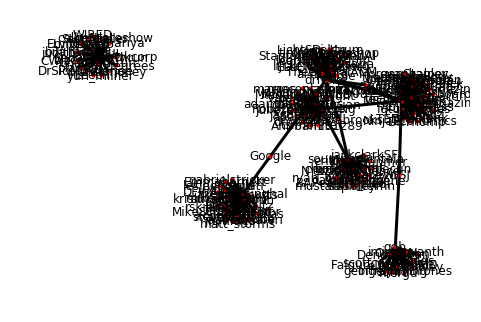

In [414]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

for i in overall_dict.keys():
    for k in overall_dict[i].keys():
        G.add_edge(i[1:],k,weight=overall_dict[i][k])

nx.draw(G, with_labels=True, font_weight='normal',node_color='red',node_size=10,width=3)
plt.show()

In [407]:
import gtk

from matplotlib.figure import Figure
from matplotlib.backends.backend_gtkagg import FigureCanvasGTKAgg as FigureCanvas
from matplotlib.backends.backend_gtkagg import NavigationToolbar2GTKAgg as NavigationToolbar

win = gtk.Window()
win.connect("destroy", lambda x: gtk.main_quit())
win.set_default_size(400,300)
win.set_title("Embedding in GTK")

vbox = gtk.VBox()
win.add(vbox)

fig = Figure(figsize=(5,4), dpi=100)
ax = fig.add_subplot(111)
ax.plot([1,2,3])

canvas = FigureCanvas(fig)  # a gtk.DrawingArea
vbox.pack_start(canvas)
toolbar = NavigationToolbar(canvas, win)
vbox.pack_start(toolbar, False, False)

win.show_all()
gtk.main()

ImportError: No module named gtk

In [468]:
import numpy as np
import requests
from bs4 import BeautifulSoup
from pprint import pprint
import pandas as pd

file_loc=r"Experts.csv"
df=pd.read_csv(file_loc)

from flask import Flask
from flask_ask import Ask, statement
import tweepy 
from tweepy import OAuthHandler

app = Flask(__name__)
ask = Ask(app, '/')

consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret =''

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

def getTweetsForkeyword(Keyword):
    results = api.user_timeline(screen_name=Keyword,tweet_mode="extended")
    tweets=[]

    for tw in results:
        temp1 = tw.full_text
        temp2 = tw._json["entities"]["urls"]
        temp3 = tw._json["entities"]["user_mentions"]

        if len(temp2) !=0:
            temp2=temp2[0]["expanded_url"]
        else:
            temp2=""
        
        temp=[]
        if len(temp3) !=0:
            for i in range(len(temp3)):
                temp.append(temp3[i]["screen_name"])
        else:
            temp=""
        tweets.append((temp1,temp2,temp))
    return tweets 

posts_all={}
writer = pd.ExcelWriter('Posts.xlsx', engine='xlsxwriter')

for i in df["TwitterName"]:
    posts=getTweetsForkeyword(i)
    df_twitter = pd.DataFrame(data = posts)
    df_twitter.to_excel(writer, sheet_name=i)

writer.save()

'''
for i in df["TwitterName"]:
    posts=getTweetsForkeyword(i)
    posts_all[i]=posts

df_twitter = pd.DataFrame(data = posts_all)
df_twitter.to_csv("Posts.csv",index=False,header=True)
'''


<type 'unicode'>
<type 'str'>
<type 'str'>
<type 'unicode'>
<type 'unicode'>
<type 'list'>
<type 'unicode'>
<type 'str'>
<type 'list'>
<type 'unicode'>
<type 'str'>
<type 'str'>
<type 'unicode'>
<type 'unicode'>
<type 'str'>
<type 'unicode'>
<type 'unicode'>
<type 'list'>
<type 'unicode'>
<type 'unicode'>
<type 'list'>
<type 'unicode'>
<type 'unicode'>
<type 'str'>
<type 'unicode'>
<type 'unicode'>
<type 'list'>
<type 'unicode'>
<type 'unicode'>
<type 'str'>
<type 'unicode'>
<type 'unicode'>
<type 'list'>
<type 'unicode'>
<type 'str'>
<type 'list'>
<type 'unicode'>
<type 'str'>
<type 'list'>
<type 'unicode'>
<type 'str'>
<type 'list'>
<type 'unicode'>
<type 'unicode'>
<type 'str'>
<type 'unicode'>
<type 'unicode'>
<type 'list'>
<type 'unicode'>
<type 'unicode'>
<type 'str'>
<type 'unicode'>
<type 'unicode'>
<type 'str'>
<type 'unicode'>
<type 'unicode'>
<type 'list'>
<type 'unicode'>
<type 'unicode'>
<type 'str'>
<type 'unicode'>
<type 'str'>
<type 'list'>
<type 'unicode'>
<type 'str'>

'\nfor i in df["TwitterName"]:\n    posts=getTweetsForkeyword(i)\n    posts_all[i]=posts\n\ndf_twitter = pd.DataFrame(data = posts_all)\ndf_twitter.to_csv("C:\\Users\\Shuttle\\Downloads\\Python Course\\Project\\Posts.csv",index=False,header=True)\n'

{u'@AndrewYNg': {'GregoryDiamos': 1,
                 'Stanford': 1,
                 'adampaulcoates': 1,
                 'bramsonboudreau': 1,
                 'coursera': 1,
                 'danboneh': 1,
                 'dhawalkapil': 1,
                 'drwoebot': 2,
                 'editorialiste': 1,
                 'goodfellow_ian': 2,
                 'ilyasut': 1,
                 'jeremy_irvin16': 1,
                 'mattlungrenMD': 1,
                 'nagaraj_arvind': 1,
                 'nvidia': 1,
                 'pranavrajpurkar': 1,
                 'techreview': 1,
                 'willknight': 1,
                 'ylecun': 1},
 u'@MFordFuture': {'ABC': 1,
                   'AarianMarshall': 1,
                   'AndrewYNg': 1,
                   'BostonMagazine': 1,
                   'CNET': 1,
                   'FT': 1,
                   'IranaWasti': 1,
                   'MFordFuture': 1,
                   'TEDTalks': 1,
                   'TechCru

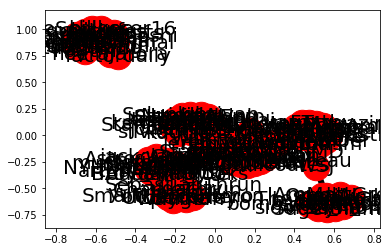

In [528]:
#Find network graph
import numpy as np
import requests
from bs4 import BeautifulSoup
from pprint import pprint
import pandas as pd
import re

threshold=1

file_loc=r"Posts.xlsx"
xls = pd.ExcelFile(file_loc)
# Now you can list all sheets in the file
temp_names=xls.sheet_names
df_twitter={}
dict={}
overall_dict={}

for names in temp_names:
    df_twitter=pd.read_excel(file_loc,sheetname=names)
    df_twitter=df_twitter.fillna('NaN')
    for j in df_twitter["Names"]:
        if j !='NaN':
            j=j.encode("ascii")
            j=j.replace("[u'","").replace("']","")
            j=j.split("', u'")
            for k in j:
                if dict.has_key(k):
                    dict[k] += 1
                else:
                    dict[k]=1
    overall_dict[names]=dict
    dict={}

#pprint(overall_dict)

import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

for i in overall_dict.keys():
    for k in overall_dict[i].keys():
        if overall_dict[i][k]>0:
            G.add_edge(i[1:],k,weight=overall_dict[i][k])

#nx.draw(G, with_labels=True, font_weight='normal',node_color='red',node_size=10,width=3)

elarge=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] >threshold]
esmall=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] <=threshold]

pos=nx.spring_layout(G) # positions for all nodes

# nodes
nx.draw_networkx_nodes(G,pos,node_size=700)

# edges
nx.draw_networkx_edges(G,pos,edgelist=elarge,
                    width=6)
nx.draw_networkx_edges(G,pos,edgelist=esmall,
                    width=6,alpha=0.5,edge_color='b',style='dashed')

# labels
nx.draw_networkx_labels(G,pos,font_size=20,font_family='sans-serif')

plt.show()

In [582]:
#Find experts on Twitter
'''
Description => Para on who they are and what they do
Entities - url - expanded_urls => Link to their sites
Location
followers_count
profile_background_image_url
'''

from flask import Flask
from flask_ask import Ask, statement
import tweepy 
from tweepy import OAuthHandler
from pprint import pprint

app = Flask(__name__)
ask = Ask(app, '/')

consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret =''

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

users=["mark_riedl","rodneyabrooks","jackclarkSF","sundarpichai","elonmusk","willknight","erichorvitz"]
list=[]

def getUserInfo(Keyword):
    results = api.get_user(screen_name=Keyword)
    
    try:
        t1=results._json["description"]
    except KeyError:
        t1="" 
    try:
        t2=results._json["entities"]["url"]["urls"][0]["expanded_url"]
    except KeyError:
        t2="" 
    try:
        t3=results._json["followers_count"]
    except KeyError:
        t3="" 
    try:
        t4=results._json["profile_image_url_https"]
    except KeyError:
        t4="" 
    
    info=[Keyword,t1,t2,t3,t4]
    return info


for i in users:
    print(i)
    info = getUserInfo(i)
    list.append(info)

pprint(list)

mark_riedl
rodneyabrooks
jackclarkSF
sundarpichai
elonmusk
willknight
erichorvitz
[['mark_riedl',
  u'Artificial intelligence, storytelling, computer games. Associate Professor at Georgia Tech School of Interactive Computing. Geek. Dad.',
  u'http://eilab.gatech.edu/mark-riedl',
  5047,
  u'https://pbs.twimg.com/profile_images/882598268823384065/nietAmrw_normal.jpg'],
 ['rodneyabrooks',
  u'Robot builder',
  u'http://www.rethinkrobotics.com',
  11422,
  u'https://pbs.twimg.com/profile_images/2479347690/photo2_normal.jpeg'],
 ['jackclarkSF',
  u"@openai. Past: @business World's Only Neural Net Reporter. @theregister Distributed Systems Reporter. jack@jack-clark.net",
  u'http://jack-clark.net',
  22376,
  u'https://pbs.twimg.com/profile_images/726446881547517952/ULhSTKxN_normal.jpg'],
 ['sundarpichai',
  u'CEO, @google',
  '',
  1442815,
  u'https://pbs.twimg.com/profile_images/864282616597405701/M-FEJMZ0_normal.jpg'],
 ['elonmusk',
  u'Tesla, SpaceX, OpenAI & Neuralink',
  '',
  152669

In [1]:
#Find @...

import numpy as np
import requests
from bs4 import BeautifulSoup
from pprint import pprint
import pandas as pd
import re

threshold=1

file_loc=r"Posts.xlsx"
xls = pd.ExcelFile(file_loc)
# Now you can list all sheets in the file
temp_names=xls.sheet_names
df_twitter={}
dict1={}
overall_dict={}

for names in temp_names:
    df_twitter=pd.read_excel(file_loc,sheetname=names)
    df_twitter=df_twitter.fillna('NaN')
    for j in df_twitter["Names"]:
        if j !='NaN':
            j=j.encode("ascii")
            j=j.replace("[u'","").replace("']","").lower()
            j=j.split("', u'")
            for k in j:
                if dict1.has_key(k):
                    dict1[k] += 1
                else:
                    dict1[k]=1
    overall_dict[names]=dict1
    #dict={}

#pprint(overall_dict)
#pprint(dict)

for key, value in sorted(dict1.iteritems(), key=lambda (k,v): (v,k),reverse=True):
    print "%s: %s" % (key, value)

df_twitter = pd.DataFrame(data = dict)
df_twitter.to_csv("NewExpertNames.csv",index=True,header=True)

SyntaxError: invalid syntax (<ipython-input-1-ad5604955edf>, line 39)